In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as lt
import seaborn as sns

In [124]:
hotel = pd.read_csv('hotel_bookings.csv')

In [125]:
hotel.shape

(119390, 32)

In [126]:
hotel['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [127]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [128]:
print('unique:', hotel['hotel'].unique(),'\n')
print("counts:",hotel['hotel'].value_counts(),'\n')
print('duplicates:',hotel['hotel'].duplicated().sum(), '\n')
print('nulls:',hotel['hotel'].isna().sum(), '\n')
print(hotel['hotel'].describe())

unique: ['Resort Hotel' 'City Hotel'] 

counts: hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64 

duplicates: 119388 

nulls: 0 

count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object


In [129]:
print('unique:', hotel['is_canceled'].unique(),'\n')
print("counts:",hotel['is_canceled'].value_counts(),'\n')
print('duplicates:',hotel['is_canceled'].duplicated().sum(), '\n')
print('nulls:',hotel['is_canceled'].isna().sum(), '\n')
print(hotel['is_canceled'].describe())

unique: [0 1] 

counts: is_canceled
0    75166
1    44224
Name: count, dtype: int64 

duplicates: 119388 

nulls: 0 

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64


In [130]:
cancel =(hotel.groupby('hotel')['is_canceled']).mean().reset_index()

In [131]:
cancel.columns = ['hotel', 'cancellation_rate']

In [132]:
cancel['cancellation_rate']= cancel['cancellation_rate']*100

In [133]:
cancel

,hotel,cancellation_rate
0,City Hotel,41.726963
1,Resort Hotel,27.763355


### The cancellation rate of the City Hotel is higher than that of the Resort Hotel.


C:\Users\Dell\AppData\Local\Temp\ipykernel_4076\994790029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='cancellation_rate', data=cancel, palette='pastel')


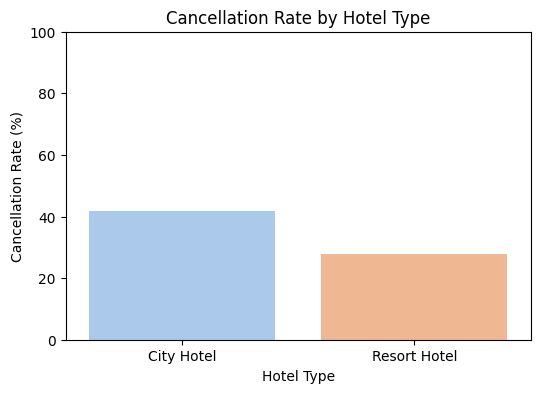

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot: Cancellation Rate by Hotel Type
plt.figure(figsize=(6, 4))
sns.barplot(x='hotel', y='cancellation_rate', data=cancel, palette='pastel')

plt.title('Cancellation Rate by Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Hotel Type')
plt.ylim(0, 100)  # since it's percentage

plt.show()


# Q2. Which month have the highest booking?

In [135]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [136]:
print('unique:', hotel['arrival_date_month'].unique(),'\n')
print("counts:",hotel['arrival_date_month'].value_counts(),'\n')
print('duplicates:',hotel['arrival_date_month'].duplicated().sum(), '\n')
print('nulls:',hotel['arrival_date_month'].isna().sum(), '\n')
print(hotel['arrival_date_month'].describe())

unique: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

counts: arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64 

duplicates: 119378 

nulls: 0 

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object


In [137]:
hotel['arrival_date_month'].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [138]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_bookings = hotel['arrival_date_month'].value_counts().reindex(month_order)


In [139]:
type(monthly_bookings)

pandas.core.series.Series

C:\Users\Dell\AppData\Local\Temp\ipykernel_4076\114146786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_bookings.index, y = monthly_bookings.values, palette='pastel' )


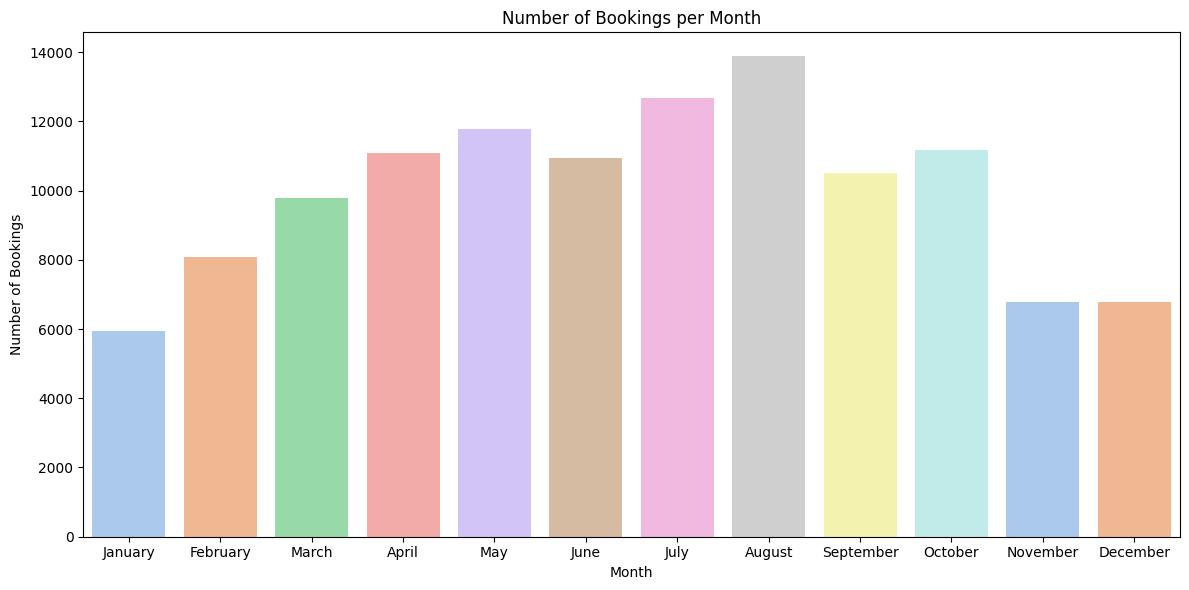

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(x = monthly_bookings.index, y = monthly_bookings.values, palette='pastel' )
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

### Ans: **August** month has the **Highest Booking** of **13877** but its **overall**, we still do not know...the yearly trend of the month...what if in some years the booking falls in august!

In [141]:
print('unique:', hotel['arrival_date_year'].unique(),'\n')
print("counts:",hotel['arrival_date_year'].value_counts(),'\n')
print('duplicates:',hotel['arrival_date_year'].duplicated().sum(), '\n')
print('nulls:',hotel['arrival_date_year'].isna().sum(), '\n')
print(hotel['arrival_date_year'].describe())

unique: [2015 2016 2017] 

counts: arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64 

duplicates: 119387 

nulls: 0 

count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64


In [142]:
monthly_yearly = hotel.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='Bookings')


In [143]:
monthly_yearly

,arrival_date_year,arrival_date_month,Bookings
0,2015,August,3889
1,2015,December,2920
2,2015,July,2776
3,2015,November,2340
4,2015,October,4957
5,2015,September,5114
6,2016,April,5428
7,2016,August,5063
8,2016,December,3860
9,2016,February,3891


In [144]:

monthly_yearly['arrival_date_month'] = pd.Categorical( monthly_yearly['arrival_date_month'], categories=month_order, ordered=True)

In [145]:
monthly_yearly = monthly_yearly.sort_values(['arrival_date_year', 'arrival_date_month'])


In [146]:
monthly_yearly

,arrival_date_year,arrival_date_month,Bookings
2,2015,July,2776
0,2015,August,3889
5,2015,September,5114
4,2015,October,4957
3,2015,November,2340
1,2015,December,2920
10,2016,January,2248
9,2016,February,3891
13,2016,March,4824
6,2016,April,5428


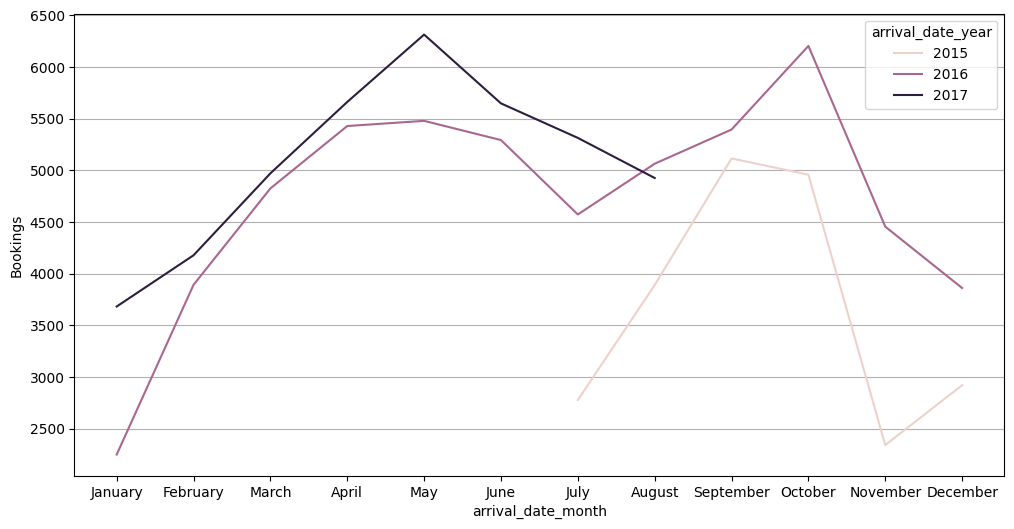

In [147]:
plt.figure(figsize=(12,6))
sns.lineplot(data= monthly_yearly, x='arrival_date_month', y= "Bookings", hue= 'arrival_date_year' )
plt.grid(axis='y')

In [148]:
monthly_yearly.loc[monthly_yearly['Bookings'].idxmax()]

arrival_date_year     2017
arrival_date_month     May
Bookings              6313
Name: 25, dtype: object

### Ans: so the month **MAY** had the highest Sale of year 2017.

May 2017 had the highest number of hotel bookings out of any month in any year in the entire dataset.

# Q3. What are the most common customer countries?

In [149]:
print('unique:', hotel['country'].unique(),'\n')
print("counts:",hotel['country'].value_counts(),'\n')
print('duplicates:',hotel['country'].duplicated().sum(), '\n')
print('nulls:',hotel['country'].isna().sum(), '\n')
print(hotel['country'].describe())

unique: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SL

In [150]:
(hotel['country'].isna().sum()/hotel['country'].shape[0])*100

0.40874445095904177

In [151]:
hotel['country'].isna().sum()

488

dropping the null values

In [152]:
hotel.dropna(subset=['country'], inplace=True)

In [153]:
hotel['country'].isna().sum()

0

In [156]:

regular_customers =hotel['country'].value_counts().head()

In [157]:
regular_customers

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64

<Axes: xlabel='country'>

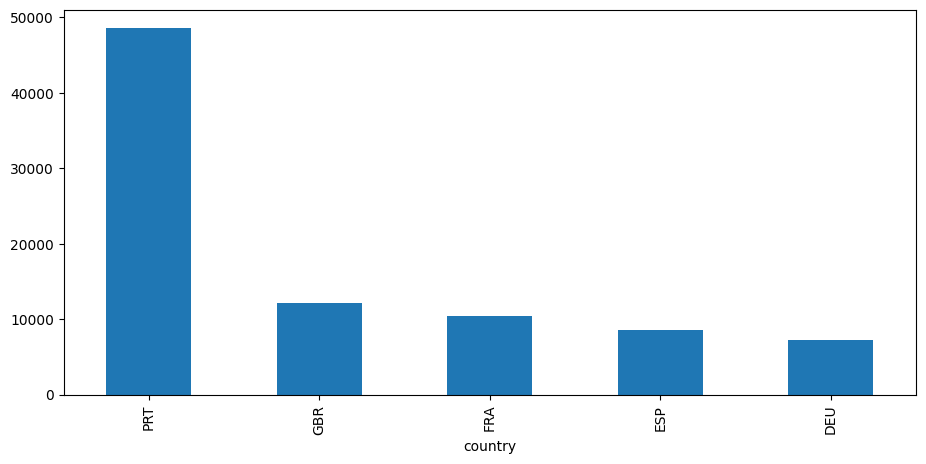

In [ ]:
regular_customers.plot(kind='bar', figsize=(11,5))



### Ans: So these are top customer countries.

# Q4. Are there any extreme or unrealistic values in the adr column?

In [160]:
print('unique:', hotel['adr'].unique(),'\n')
print("counts:",hotel['adr'].value_counts(),'\n')
print('duplicates:',hotel['adr'].duplicated().sum(), '\n')
print('nulls:',hotel['adr'].isna().sum(), '\n')
print(hotel['adr'].describe())

unique: [  0.    75.    98.   ... 266.75 209.25 157.71] 

counts: adr
62.00     3753
75.00     2710
90.00     2471
65.00     2397
0.00      1938
          ... 
96.09        1
48.03        1
89.43        1
63.07        1
157.71       1
Name: count, Length: 8870, dtype: int64 

duplicates: 110032 

nulls: 0 

count    118902.000000
mean        102.000808
std          50.487004
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


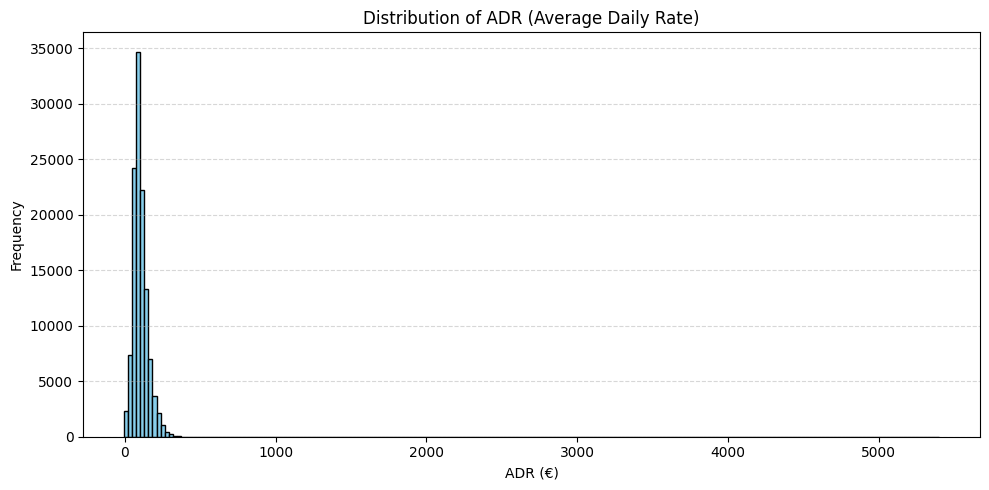

In [167]:
plt.figure(figsize=(10,5))
hotel['adr'].plot(kind='hist', bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR (€)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


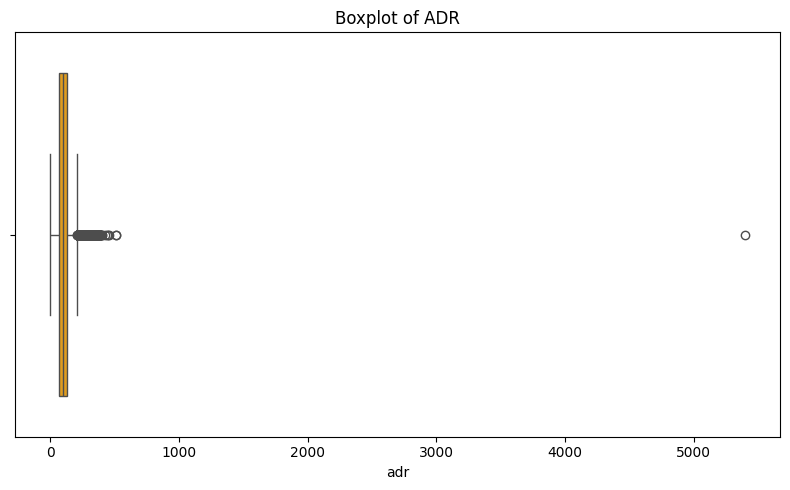

In [169]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=hotel, x='adr', color='orange')
plt.title('Boxplot of ADR')
plt.tight_layout()
plt.show()


### Yes the adr column is having outliers.....with max value of 5400 and min of -6.38 which is unrealistic as well.

In [178]:

hotel_clean = hotel[(hotel['adr'] >= 0) & (hotel['adr'] <= 500)]


<Axes: xlabel='adr'>

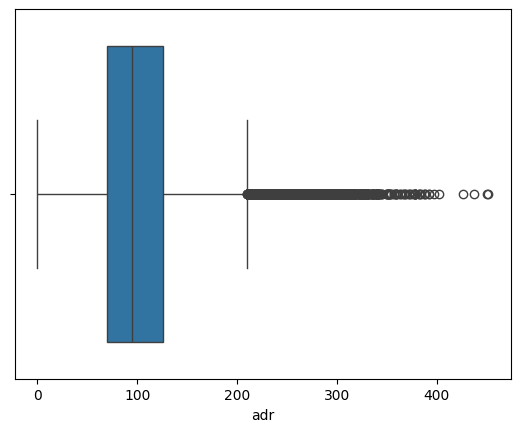

In [179]:
sns.boxplot(data=hotel_clean, x = 'adr')

# Q5. Which meal type are most booked and are there any unusual or missing values?

In [180]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [181]:
print('unique:', hotel['meal'].unique(),'\n')
print("counts:",hotel['meal'].value_counts(),'\n')
print('duplicates:',hotel['meal'].duplicated().sum(), '\n')
print('nulls:',hotel['meal'].isna().sum(), '\n')
print(hotel['meal'].describe())

unique: ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

counts: meal
BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: count, dtype: int64 

duplicates: 118897 

nulls: 0 

count     118902
unique         5
top           BB
freq       91867
Name: meal, dtype: object


The value **Undefined** has occured 1165 times which is leading to uncertainity, it can be due to data entry issue or mistake...or, some other hidden potential reason!

In [186]:
(hotel['meal']=='Undefined').value_counts()/len(hotel)*100

meal
False    99.020202
True      0.979798
Name: count, dtype: float64

In [187]:
undefined = hotel[hotel['meal']=='Undefined']

In [190]:
undefined.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,No Deposit,313.0,NaN,65,Transient-Party,69.0,0,0,Check-Out,11/24/2015
3107,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,No Deposit,313.0,NaN,65,Transient-Party,69.0,0,0,Check-Out,11/24/2015
3108,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,No Deposit,313.0,NaN,65,Transient-Party,69.0,0,0,Check-Out,11/24/2015
3110,Resort Hotel,0,62,2015,November,47,18,2,4,2,...,No Deposit,313.0,NaN,0,Transient-Party,69.0,0,0,Check-Out,11/24/2015
3111,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,No Deposit,313.0,NaN,65,Transient-Party,69.0,0,0,Check-Out,11/24/2015


In [189]:
undefined[['is_canceled', 'hotel', 'adr', 'country', 'reservation_status']].head()


,is_canceled,hotel,adr,country,reservation_status
3106,0,Resort Hotel,69.0,ESP,Check-Out
3107,0,Resort Hotel,69.0,ESP,Check-Out
3108,0,Resort Hotel,69.0,ESP,Check-Out
3110,0,Resort Hotel,69.0,ESP,Check-Out
3111,0,Resort Hotel,69.0,ESP,Check-Out


#### This clearly tells that these are  the valid bookings so we are not going to remove them, because the guest actually stayed just that his/her meal information is not given may be due to technical glitch. OR we can replace undefined with **no meal info** as well for more clarity.

In [191]:
hotel['meal'].replace('Undefined', 'No meal Info', inplace=True)

# Q6. Which market segments cancels the most ?

In [192]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 118902, dtype: object

In [194]:
print('unique:', hotel['market_segment'].unique(),'\n')
print("counts:",hotel['market_segment'].value_counts(),'\n')
print('duplicates:',hotel['market_segment'].duplicated().sum(), '\n')
print('nulls:',hotel['market_segment'].isna().sum(), '\n')
print(hotel['market_segment'].describe())

unique: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] 

counts: market_segment
Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: count, dtype: int64 

duplicates: 118894 

nulls: 0 

count        118902
unique            8
top       Online TA
freq          56403
Name: market_segment, dtype: object


In [195]:
print('unique:', hotel['is_canceled'].unique(),'\n')
print("counts:",hotel['is_canceled'].value_counts(),'\n')
print('duplicates:',hotel['is_canceled'].duplicated().sum(), '\n')
print('nulls:',hotel['is_canceled'].isna().sum(), '\n')
print(hotel['is_canceled'].describe())

unique: [0 1] 

counts: is_canceled
0    74745
1    44157
Name: count, dtype: int64 

duplicates: 118900 

nulls: 0 

count    118902.000000
mean          0.371373
std           0.483174
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64


In [214]:
segment_cancelling =hotel.groupby('market_segment')['is_canceled'].value_counts().reset_index()

In [215]:
segment_cancelling


,market_segment,is_canceled,count
0,Aviation,0,185
1,Aviation,1,52
2,Complementary,0,644
3,Complementary,1,90
4,Corporate,0,4133
5,Corporate,1,978
6,Direct,0,10528
7,Direct,1,1921
8,Groups,1,12097
9,Groups,0,7709


#### The highest cancellation is done by ONLINE TA segment.

# Q7. Is there a relationship between lead time and cancellations?

In [219]:
#print('unique:', hotel['lead_time'].unique(),'\n')
print("counts:",hotel['lead_time'].value_counts(),'\n')
print('duplicates:',hotel['lead_time'].duplicated().sum(), '\n')
print('nulls:',hotel['lead_time'].isna().sum(), '\n')
print(hotel['lead_time'].describe())

counts: lead_time
0      6223
1      3395
2      2034
3      1802
4      1696
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64 

duplicates: 118423 

nulls: 0 

count    118902.000000
mean        104.308027
std         106.903127
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64


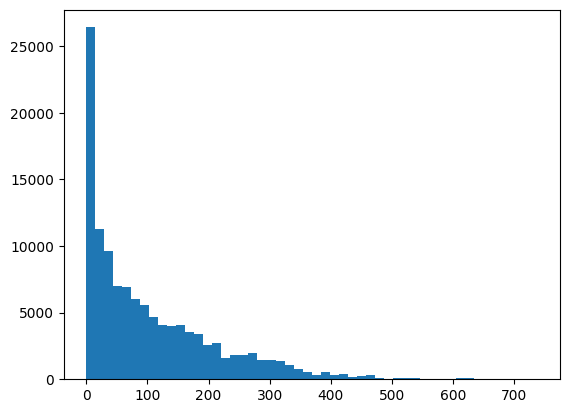

In [223]:
plt.hist(x=hotel['lead_time'], bins=50)
plt.show()

<Axes: xlabel='lead_time'>

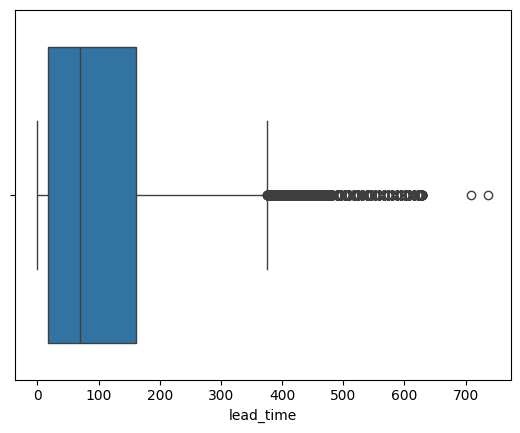

In [225]:
sns.boxplot(x=hotel['lead_time'])

This means that the outliers are present in the data so we need to remove them,the max range is going till 400.

In [227]:
print("Total rows:", len(hotel))
print("Rows with lead_time > 400:", len(hotel[hotel['lead_time'] > 400]))
print(2114/118902 *100)

Total rows: 118902
Rows with lead_time > 400: 2114
1.7779347698104322


safe to remove since these rows are around 2% only!

In [228]:
hotel= hotel[hotel['lead_time']<=400]

In [229]:
len(hotel)

116788

<Axes: xlabel='lead_time'>

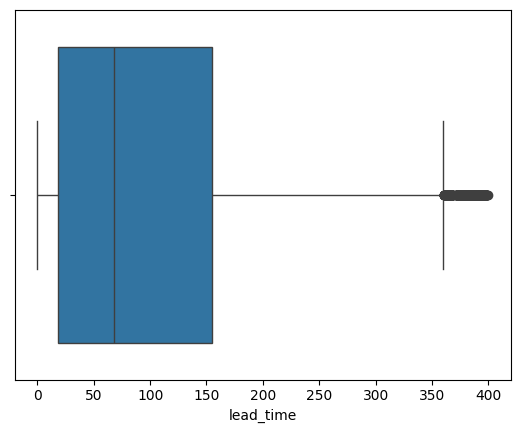

In [230]:
sns.boxplot(x=hotel['lead_time'])

In [232]:
lead_cancel = hotel.groupby('lead_time')['is_canceled'].mean().reset_index()


In [233]:
lead_cancel.head()

,lead_time,is_canceled
0,0,0.066849
1,1,0.093962
2,2,0.103736
3,3,0.100444
4,4,0.102005


In [238]:
lead_cancel.corr()

,lead_time,is_canceled
lead_time,1.000000,0.561309
is_canceled,0.561309,1.000000


<Axes: >

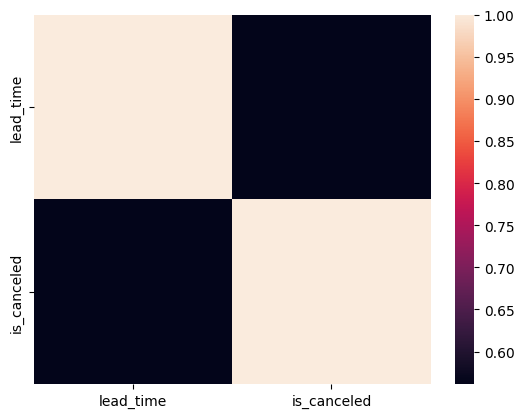

In [239]:
sns.heatmap(lead_cancel.corr())

It is showing strong corelation between the cancellation and lead time, so longer lead time(pre-booking) means the chances of cancellation increases.

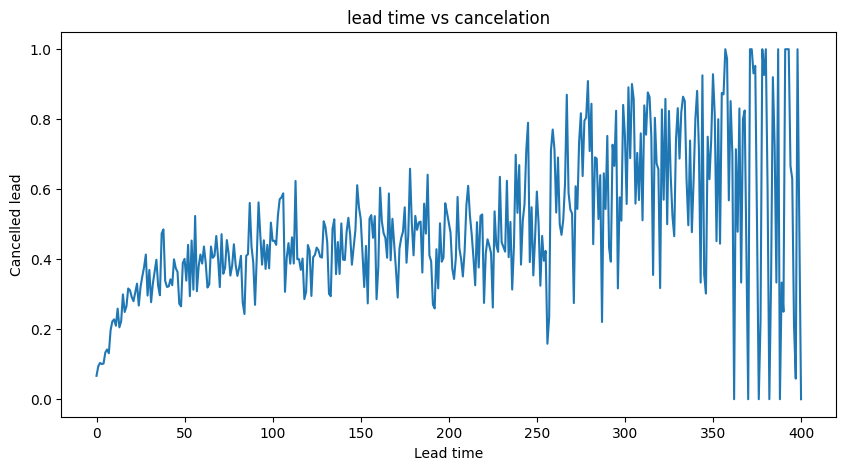

In [237]:
plt.figure(figsize=(10,5))
sns.lineplot(data= lead_cancel, x='lead_time', y= 'is_canceled')

plt.ylabel("Cancelled lead")
plt.xlabel("Lead time")
plt.title("lead time vs cancelation")
plt.show()

# Q8. What is the distribution of stays (weekday vs weekend)?

In [240]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [250]:
weekday_counts = hotel['stays_in_week_nights'].value_counts().sort_index()

In [249]:
weekend_counts=hotel['stays_in_weekend_nights'].value_counts().sort_index()

In [247]:
print("Weekend total stays:", hotel['stays_in_weekend_nights'].sum())
print("Weekday total stays:", hotel['stays_in_week_nights'].sum())


Weekend total stays: 109398
Weekday total stays: 293331


C:\Users\Dell\AppData\Local\Temp\ipykernel_4076\2082776869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_counts.index, y=weekend_counts.values, palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_4076\2082776869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='muted')


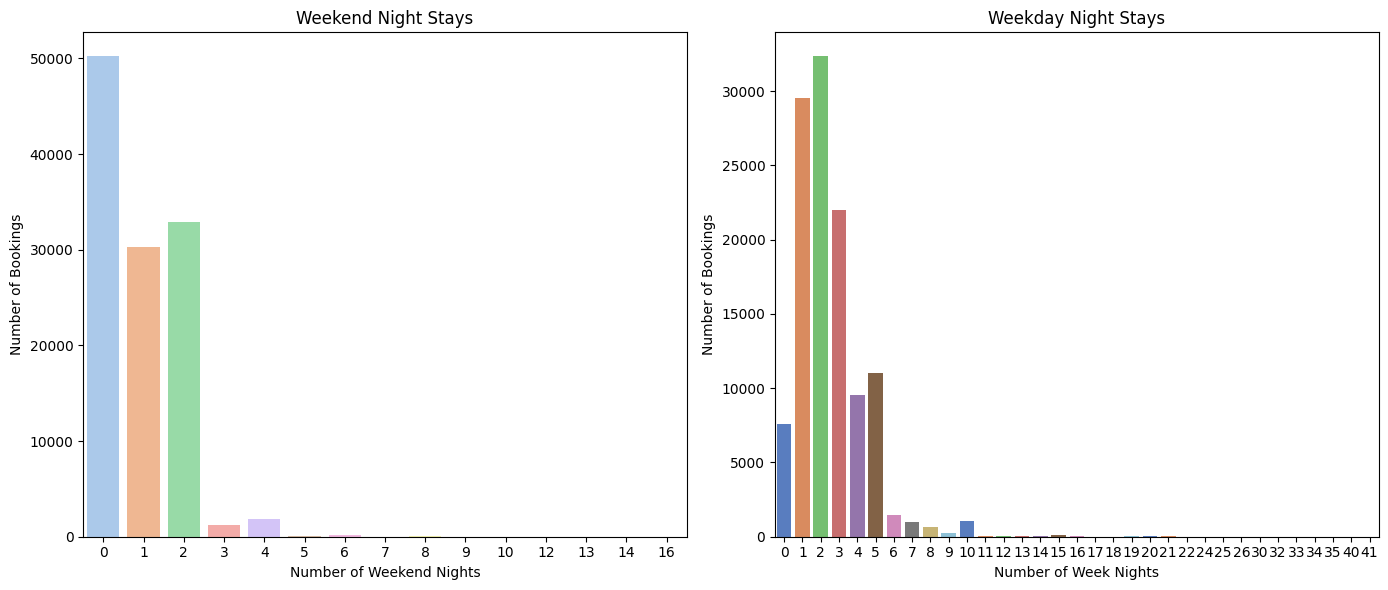

In [251]:
plt.figure(figsize=(14, 6))

# Weekend
plt.subplot(1, 2, 1)
sns.barplot(x=weekend_counts.index, y=weekend_counts.values, palette='pastel')
plt.title('Weekend Night Stays')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Bookings')

# Weekday
plt.subplot(1, 2, 2)
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='muted')
plt.title('Weekday Night Stays')
plt.xlabel('Number of Week Nights')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()

#### Ans: This tells that weekday stays are more common rather than the weekend stays.

# Q9. Which countries have the highest number of bookings?

In [256]:

print("counts:",hotel['country'].value_counts().sort_values(ascending=False),'\n')
print('duplicates:',hotel['country'].duplicated().sum(), '\n')
print('nulls:',hotel['country'].isna().sum(), '\n')
print(hotel['country'].describe())

counts: country
PRT    47036
GBR    11938
FRA    10387
ESP     8568
DEU     7025
       ...  
LCA        1
GUY        1
PYF        1
DMA        1
NAM        1
Name: count, Length: 177, dtype: int64 

duplicates: 116611 

nulls: 0 

count     116788
unique       177
top          PRT
freq       47036
Name: country, dtype: object


In [262]:
top=hotel['country'].value_counts().sort_values(ascending=False).head(5)

In [263]:
top

country
PRT    47036
GBR    11938
FRA    10387
ESP     8568
DEU     7025
Name: count, dtype: int64

<BarContainer object of 5 artists>

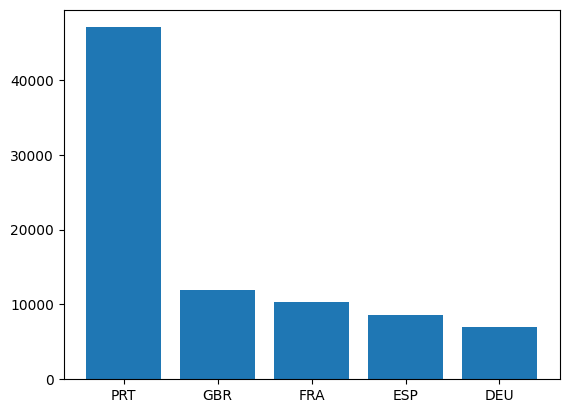

In [267]:
plt.bar(top.index, top.values)

#### Ans: Highest is PRT (Portugal)

# Q10. What is the trend of average ADR by month?

In [268]:
print('unique:', hotel['arrival_date_month'].unique(),'\n')
print("counts:",hotel['arrival_date_month'].value_counts(),'\n')
print('duplicates:',hotel['arrival_date_month'].duplicated().sum(), '\n')
print('nulls:',hotel['arrival_date_month'].isna().sum(), '\n')
print(hotel['arrival_date_month'].describe())

unique: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

counts: arrival_date_month
August       13564
July         12215
May          11511
April        11023
October      10888
June         10819
September    10139
March         9654
February      7943
November      6654
December      6572
January       5806
Name: count, dtype: int64 

duplicates: 116776 

nulls: 0 

count     116788
unique        12
top       August
freq       13564
Name: arrival_date_month, dtype: object


In [269]:
monthly_adr = hotel.groupby('arrival_date_month')['adr'].mean().reset_index()


In [270]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_adr['arrival_date_month'] = pd.Categorical(
    monthly_adr['arrival_date_month'], 
    categories=month_order, 
    ordered=True
)

# Sort them in calendar order
monthly_adr = monthly_adr.sort_values('arrival_date_month')


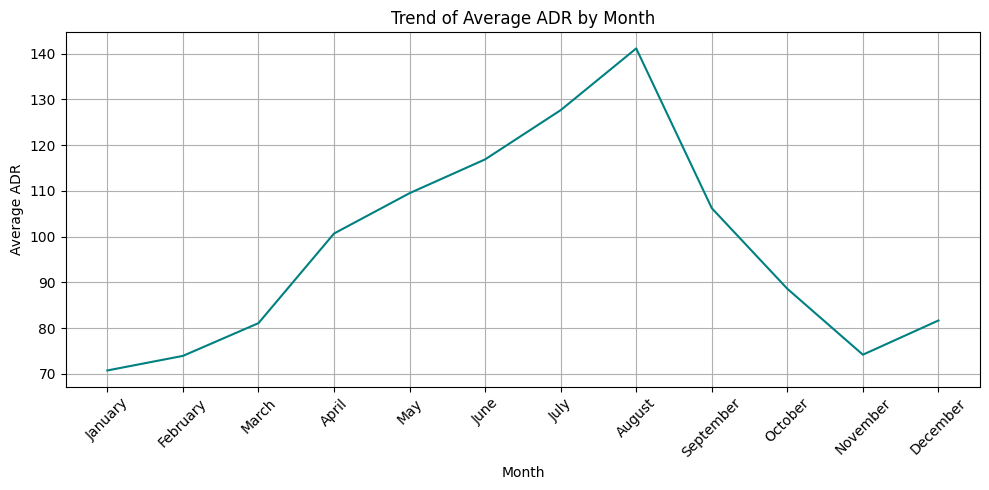

In [272]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr', color='teal')

plt.title("Trend of Average ADR by Month")
plt.xlabel("Month")
plt.ylabel("Average ADR")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ans: Peak time = june to september...then decreasing slowely!

# Q11. Which room types are most often upgraded?

In [273]:
print('unique:', hotel['reserved_room_type'].unique(),'\n')
print("counts:",hotel['reserved_room_type'].value_counts(),'\n')

print('nulls:',hotel['reserved_room_type'].isna().sum(), '\n')
print(hotel['reserved_room_type'].describe())

unique: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P'] 

counts: reserved_room_type
A    83508
D    19167
E     6483
F     2890
G     2083
B     1118
C      930
H      601
L        6
P        2
Name: count, dtype: int64 

nulls: 0 

count     116788
unique        10
top            A
freq       83508
Name: reserved_room_type, dtype: object


In [275]:
print('unique:', hotel['assigned_room_type'].unique(),'\n')
print("counts:",hotel['assigned_room_type'].value_counts(),'\n')

print('nulls:',hotel['assigned_room_type'].isna().sum(), '\n')
print(hotel['assigned_room_type'].describe())

unique: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K' 'P'] 

counts: assigned_room_type
A    71829
D    25141
E     7716
F     3729
G     2539
C     2348
B     2141
H      708
I      356
K      278
P        2
L        1
Name: count, dtype: int64 

nulls: 0 

count     116788
unique        12
top            A
freq       71829
Name: assigned_room_type, dtype: object


In [276]:
hotel['is_upgraded'] = hotel['assigned_room_type'] != hotel['reserved_room_type']


In [280]:
print('unique:', hotel['is_upgraded'].unique(),'\n')
print("counts:",hotel['is_upgraded'].value_counts(),'\n')

print('nulls:',hotel['is_upgraded'].isna().sum(), '\n')
print(hotel['is_upgraded'].describe())

unique: [False  True] 

counts: is_upgraded
False    102148
True      14640
Name: count, dtype: int64 

nulls: 0 

count     116788
unique         2
top        False
freq      102148
Name: is_upgraded, dtype: object


In [277]:
upgraded = hotel[hotel['is_upgraded']]


In [278]:
upgrade_counts = upgraded['reserved_room_type'].value_counts()
print(upgrade_counts)


reserved_room_type
A    12134
D     1459
E      607
F      189
B      130
G       51
C       48
H       17
L        5
Name: count, dtype: int64


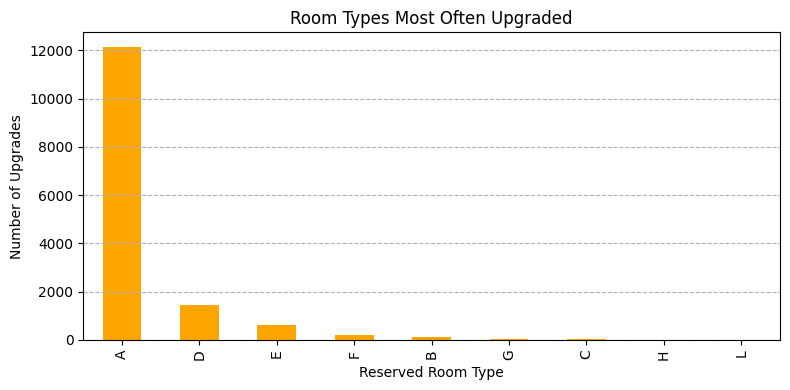

In [279]:
upgrade_counts.sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(8,4))
plt.title("Room Types Most Often Upgraded")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Upgrades")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### Ans: This tells the room A is most booked...and also most upgraded may be because, it might be the cheapest(so highly booked) and guest might shift to other when better rooms are available(so highly upgraded).

# Q12. Do guests with special requests cancel more or less often?

In [281]:
print(hotel['total_of_special_requests'].unique())
print(hotel['total_of_special_requests'].value_counts())
print(hotel['total_of_special_requests'].isna().sum())


[0 1 3 2 4 5]
total_of_special_requests
0    68280
1    32769
2    12881
3     2481
4      339
5       38
Name: count, dtype: int64
0


In [283]:
request_cancellation = hotel.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()
request_cancellation.head()

,total_of_special_requests,is_canceled
0,0,0.468702
1,1,0.222955
2,2,0.221955
3,3,0.178960
4,4,0.106195


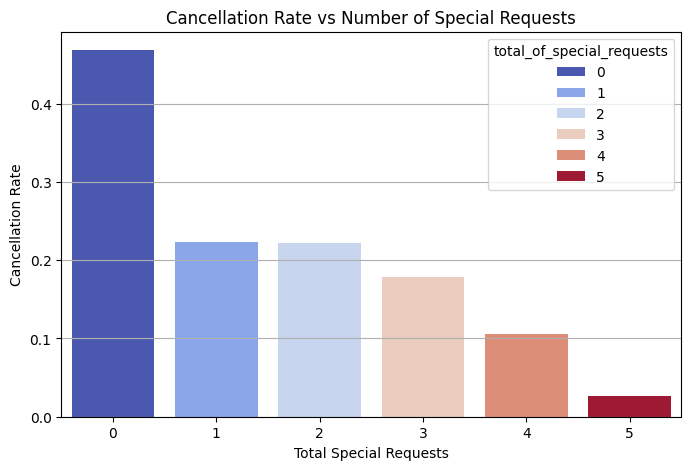

In [287]:
plt.figure(figsize=(8,5))
sns.barplot(data=request_cancellation, x='total_of_special_requests', y='is_canceled', palette='coolwarm', hue= 'total_of_special_requests')

plt.title("Cancellation Rate vs Number of Special Requests")
plt.xlabel("Total Special Requests")
plt.ylabel("Cancellation Rate")

plt.grid(axis='y')
plt.show()

<Axes: >

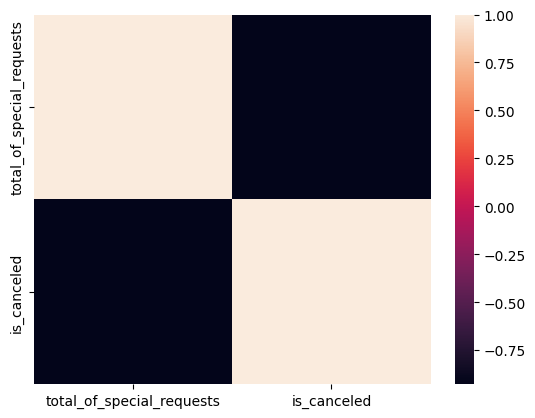

In [289]:
sns.heatmap(request_cancellation.corr())

#### Ans: This tells that more the special request, the less they will get cancelled. Hence, inverse relation exist.

# Q  What is the correlation between numerical columns?

In [290]:

numerical_data = hotel.select_dtypes(include='number')


In [291]:
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.281357           0.014976   
lead_time                          0.281357   1.000000           0.010573   
arrival_date_year                  0.014976   0.010573           1.000000   
arrival_date_week_number           0.003425   0.127604          -0.543110   
arrival_date_day_of_month         -0.004478   0.003625          -0.001946   
stays_in_weekend_nights            0.005773   0.126730           0.025453   
stays_in_week_nights               0.029223   0.205821           0.035692   
adults                             0.057487   0.127175           0.029075   
children                           0.008219  -0.025221           0.057238   
babies                            -0.031822  -0.018501          -0.012539   
is_repeated_guest                 -0.083920  -0.128570           0.011824   
previous_cancellations             0.111486   0.100959          -0.119300   

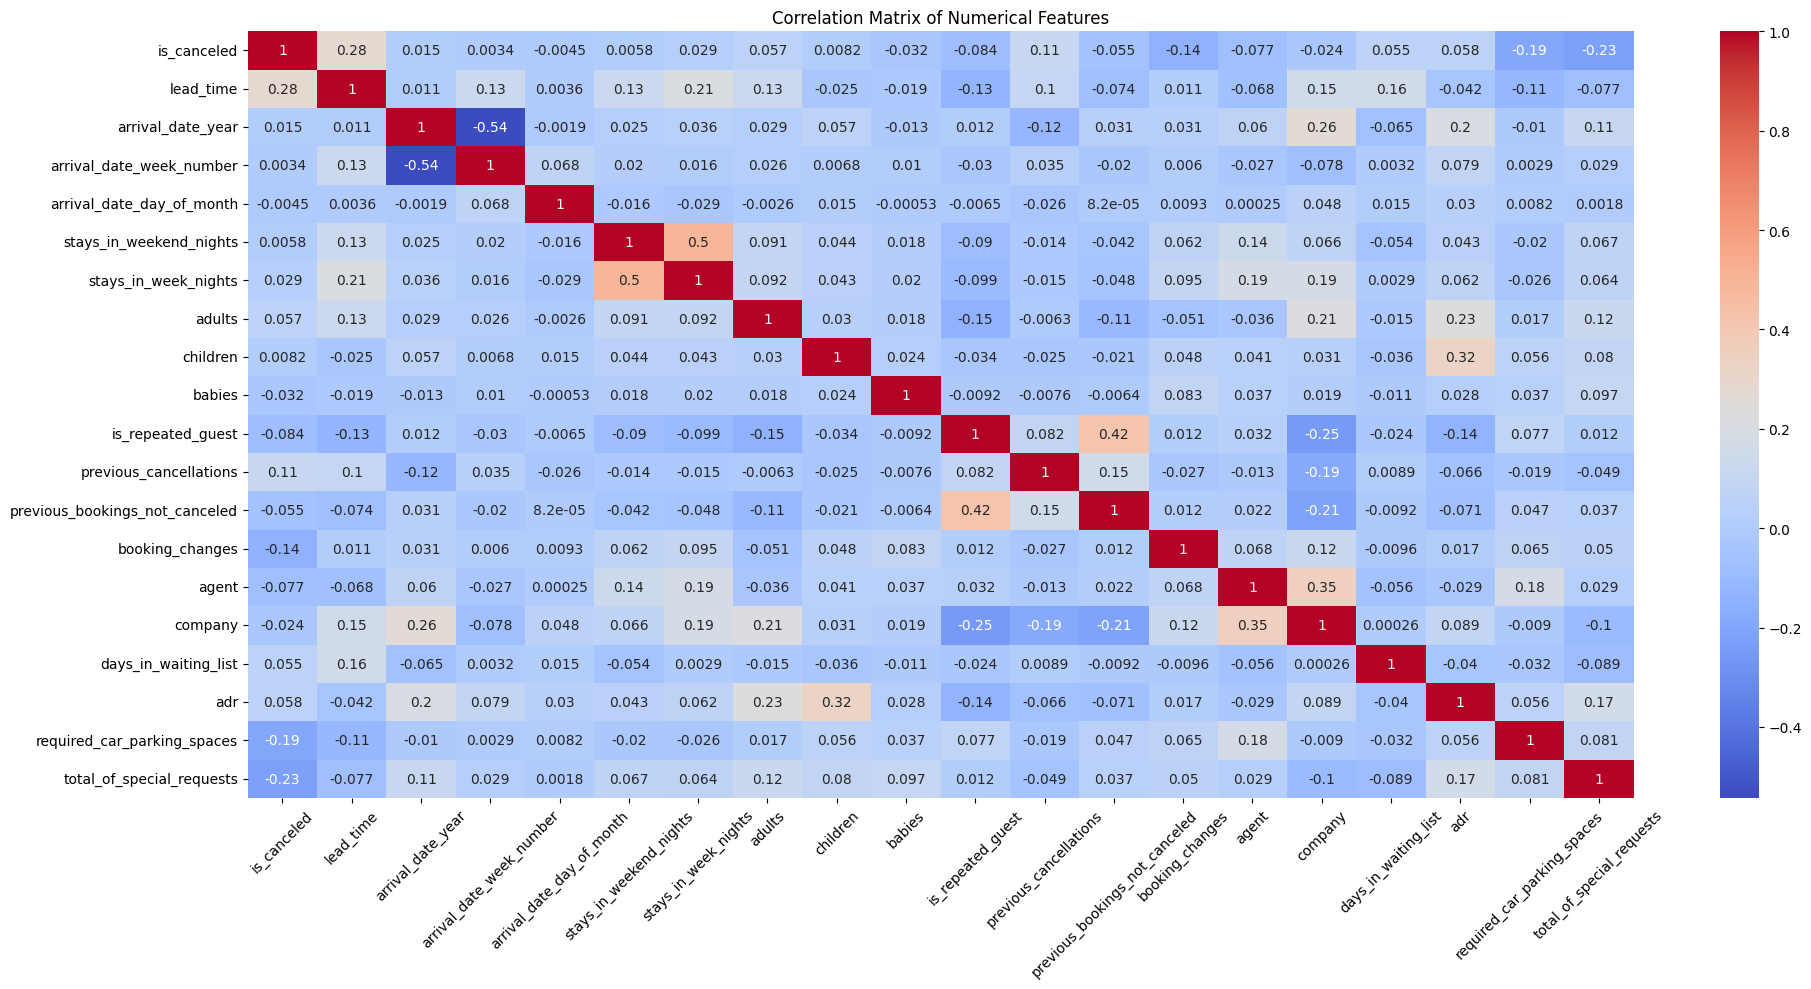

In [294]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()